In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import eda

In [2]:
data = pd.read_parquet('banca_sample.parquet')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 672 entries, REF_TIME to BOND_MAX_MATCHING_DATE_SELL_6M
dtypes: category(2), float64(666), int32(3), object(1)
memory usage: 51.0+ MB


,REF_TIME,CUSID,LABEL_TIME,LABEL,GENDER,CITY,AGE,MONTH_ON_BANK,CASA_BAL_MEAN_BAL_INCREASE_GREATER_1E6_6M,CASA_BAL_MEAN_BAL_INCREASE_GREATER_30E6_6M,...,BOND_MEAN_ORDER_SELL_6M,BOND_MAX_ORDER_SELL_6M,BOND_MEAN_MAX_QUANTITY_SELL_6M,BOND_STD_QUANTITY_SELL_6M,BOND_AVG_MEAN_QUANTITY_SELL_6M,BOND_MEAN_MAX_VOLUME_SELL_6M,BOND_MEAN_STD_VOLUME_SELL_6M,BOND_AVG_MEAN_VOLUME_SELL_6M,BOND_MEAN_NUM_SALEID_SELL_6M,BOND_MAX_MATCHING_DATE_SELL_6M
0,20210630,20652348,202108,0,FEMALE,HO-CHI-MINH,30.0,161.0,0.028090,0.005618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210731,25296202,202109,0,FEMALE,HA-NOI,33.0,114.0,0.033333,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20201130,21425455,202101,0,FEMALE,HA-NOI,31.0,141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20220228,32064176,202204,0,MALE,HA-NOI,25.0,50.0,0.055249,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210831,30730483,202110,0,FEMALE,HA-NOI,27.0,58.0,0.206522,0.114130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


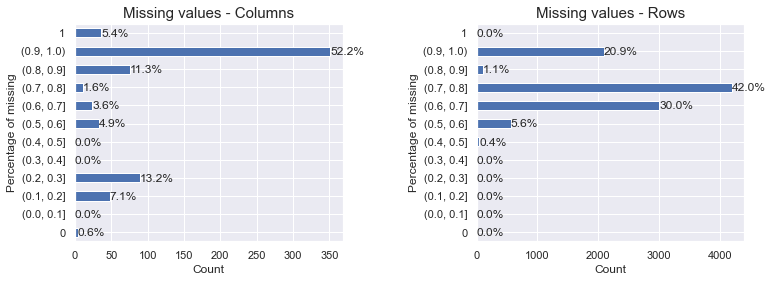

In [3]:
eda.count_missing_values(data)

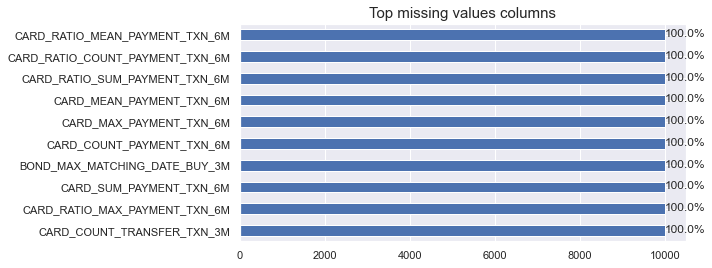

In [4]:
eda.top_missing_columns(data)

In [10]:
columns = data.select_dtypes(include=np.number).columns
columns = columns[0:10]
columns

Index(['REF_TIME', 'LABEL_TIME', 'LABEL', 'AGE', 'MONTH_ON_BANK',
       'CASA_BAL_MEAN_BAL_INCREASE_GREATER_1E6_6M',
       'CASA_BAL_MEAN_BAL_INCREASE_GREATER_30E6_6M',
       'CASA_BAL_VARIANCE_BAL_CHANGE_6M',
       'CASA_BAL_MEAN_BAL_DECREASE_LOWER_1E6_6M',
       'CASA_BAL_MEAN_BAL_INCREASE_GREATER_5E6_6M'],
      dtype='object')

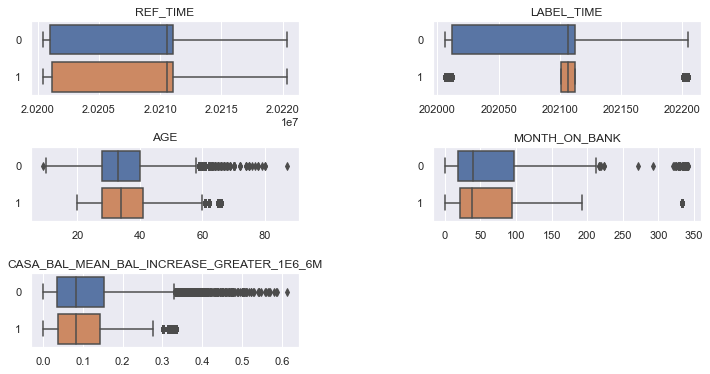

In [7]:
eda.allplot(data[columns], label='LABEL', kind='box')

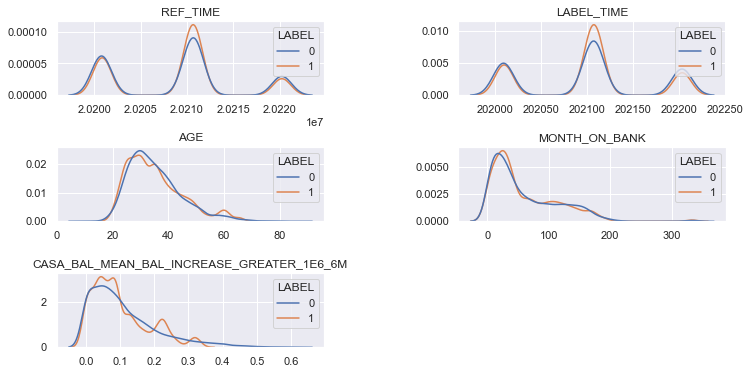

In [8]:
eda.allplot(data[columns], label='LABEL', kind='kde')

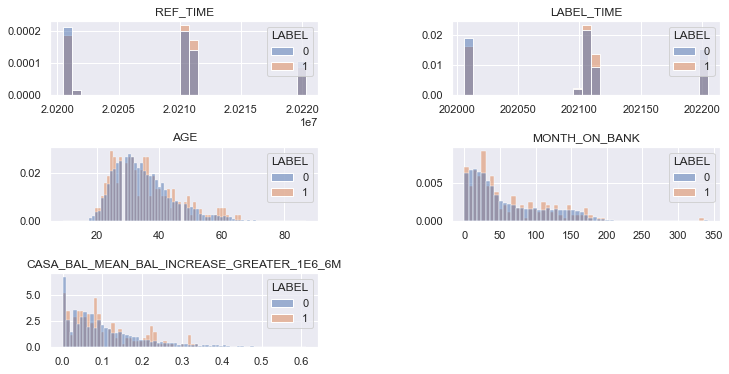

In [9]:
eda.allplot(data[columns], label='LABEL', kind='hist')

In [18]:
a = data['CASA_BAL_VARIANCE_BAL_CHANGE_6M'].astype('float16')
a

0       inf
1       inf
2       NaN
3       inf
4       inf
       ... 
9995    inf
9996    inf
9997    inf
9998    inf
9999    inf
Name: CASA_BAL_VARIANCE_BAL_CHANGE_6M, Length: 10000, dtype: float16

In [20]:
a.describe()

/Users/khanhtpd/opt/anaconda3/envs/mlframework/lib/python3.10/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    8112.0
mean        inf
std         NaN
min         0.0
25%         NaN
50%         NaN
75%         NaN
max         inf
Name: CASA_BAL_VARIANCE_BAL_CHANGE_6M, dtype: float64

<AxesSubplot:xlabel='CASA_BAL_VARIANCE_BAL_CHANGE_6M', ylabel='Count'>

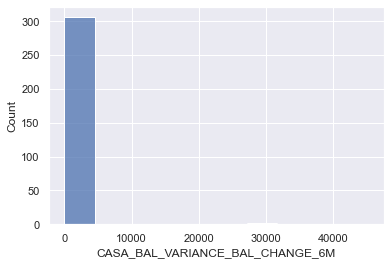

In [19]:
sns.histplot(a)

KeyboardInterrupt: 

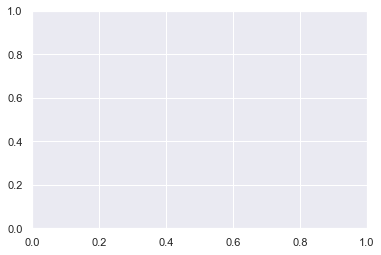

In [14]:
sns.histplot(x='CASA_BAL_VARIANCE_BAL_CHANGE_6M', hue='LABEL', data=data);